# PREDICCION DE PRECIOS DE AGUACATE EN EEUU





# Enunciado del Problema

- Los datos representan ventas semanales desde 2015 a 2018 a nivel de todos los EEUU. 
- Los datos provienen directamente de las cajas registradoras basados en ventas de aguacate variedad Hass. 
- El precio promedio de los aguacates reflejan el costo por unidad, aún cuando estos se vendan por bolsas. 
- Los códigos (Product Lookup codes ó PLU) en la tabla son solo de aguacates Hass.  No se incluyen otras variedades.

Columnas relevantes en el conjunto de datos:

- Date - la fecha de la observación
- AveragePrice - el precio promedio de una unidad
- type - convencional u orgánico
- year - el año
- Region - la ciudad o región de la observación
- Total Volume - número total de aguacates vendidos
- 4046 - número total de aguacates con PLU 4046 vendidos
- 4225 - número total de aguacates con PLU 4225 vendidos
- 4770 - número total de aguacates con PLU 4770 vendidos



# Importar las librerías

In [70]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from prophet import *

# Carga de datos

In [2]:
df = pd.read_csv('./aguacates_EEUU.csv')

# Explorar el conjunto de datos  

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Asegurar que estén los datos en orden cronológico

In [33]:
# convert to date
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.sort_values(by='Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# Realizar una gráfica de precios promedio vrs fecha

¿Cuál es la tendencia a nivel nacional?

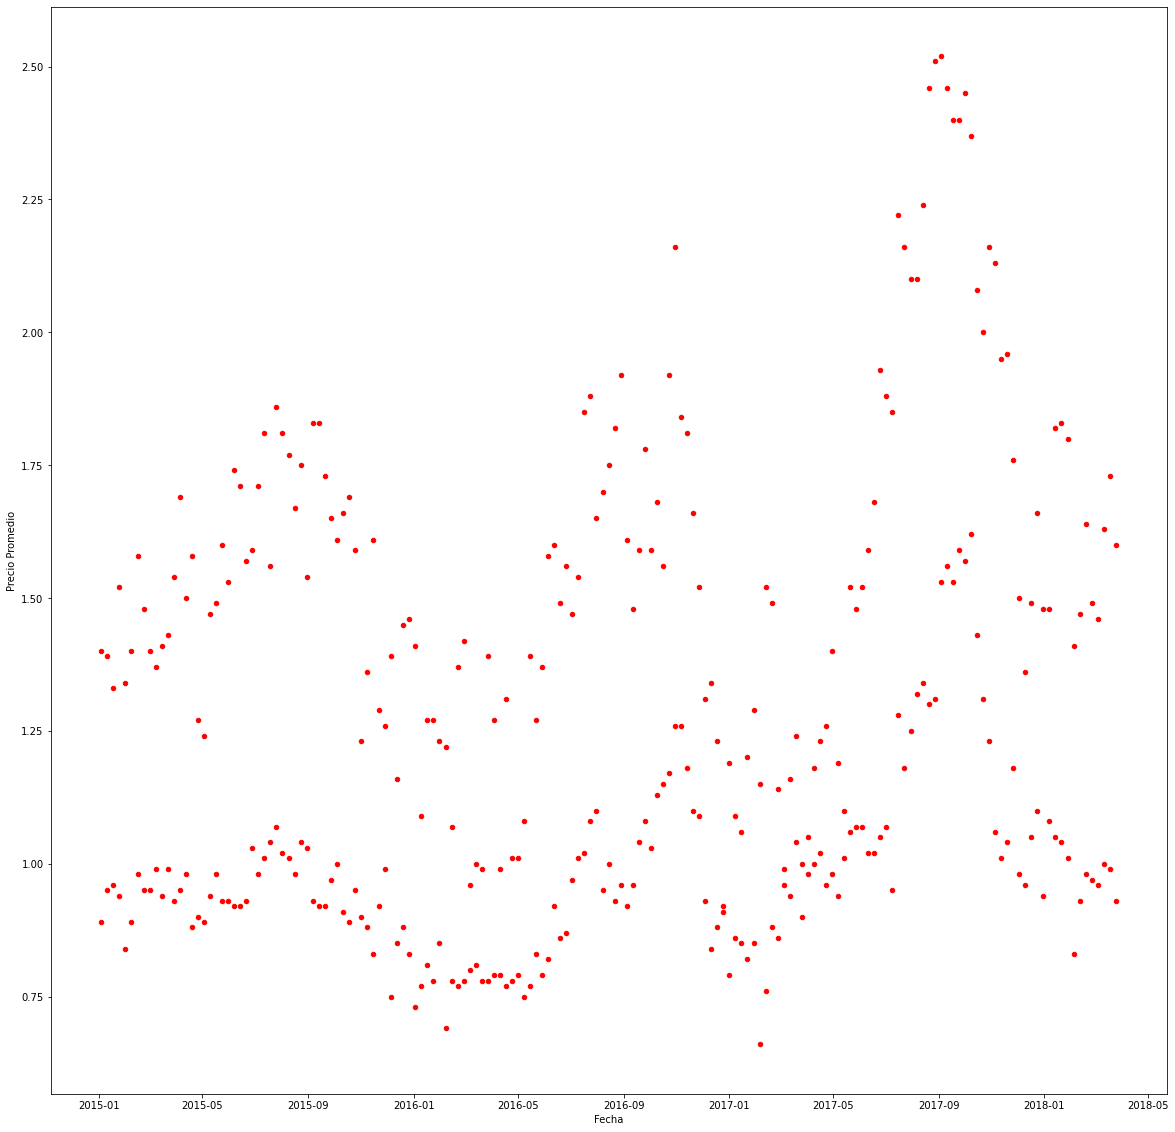

In [57]:
df.plot(kind='scatter',x='Date',y='AveragePrice',color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

La tendencia a nivel nacional es que exista un incremento del precio promedio a finales de año y esta disminuya a principios del siguiente.

# Realizar una gráfica de barras para ver el número de regiones

Text(0, 0.5, 'Conteo')

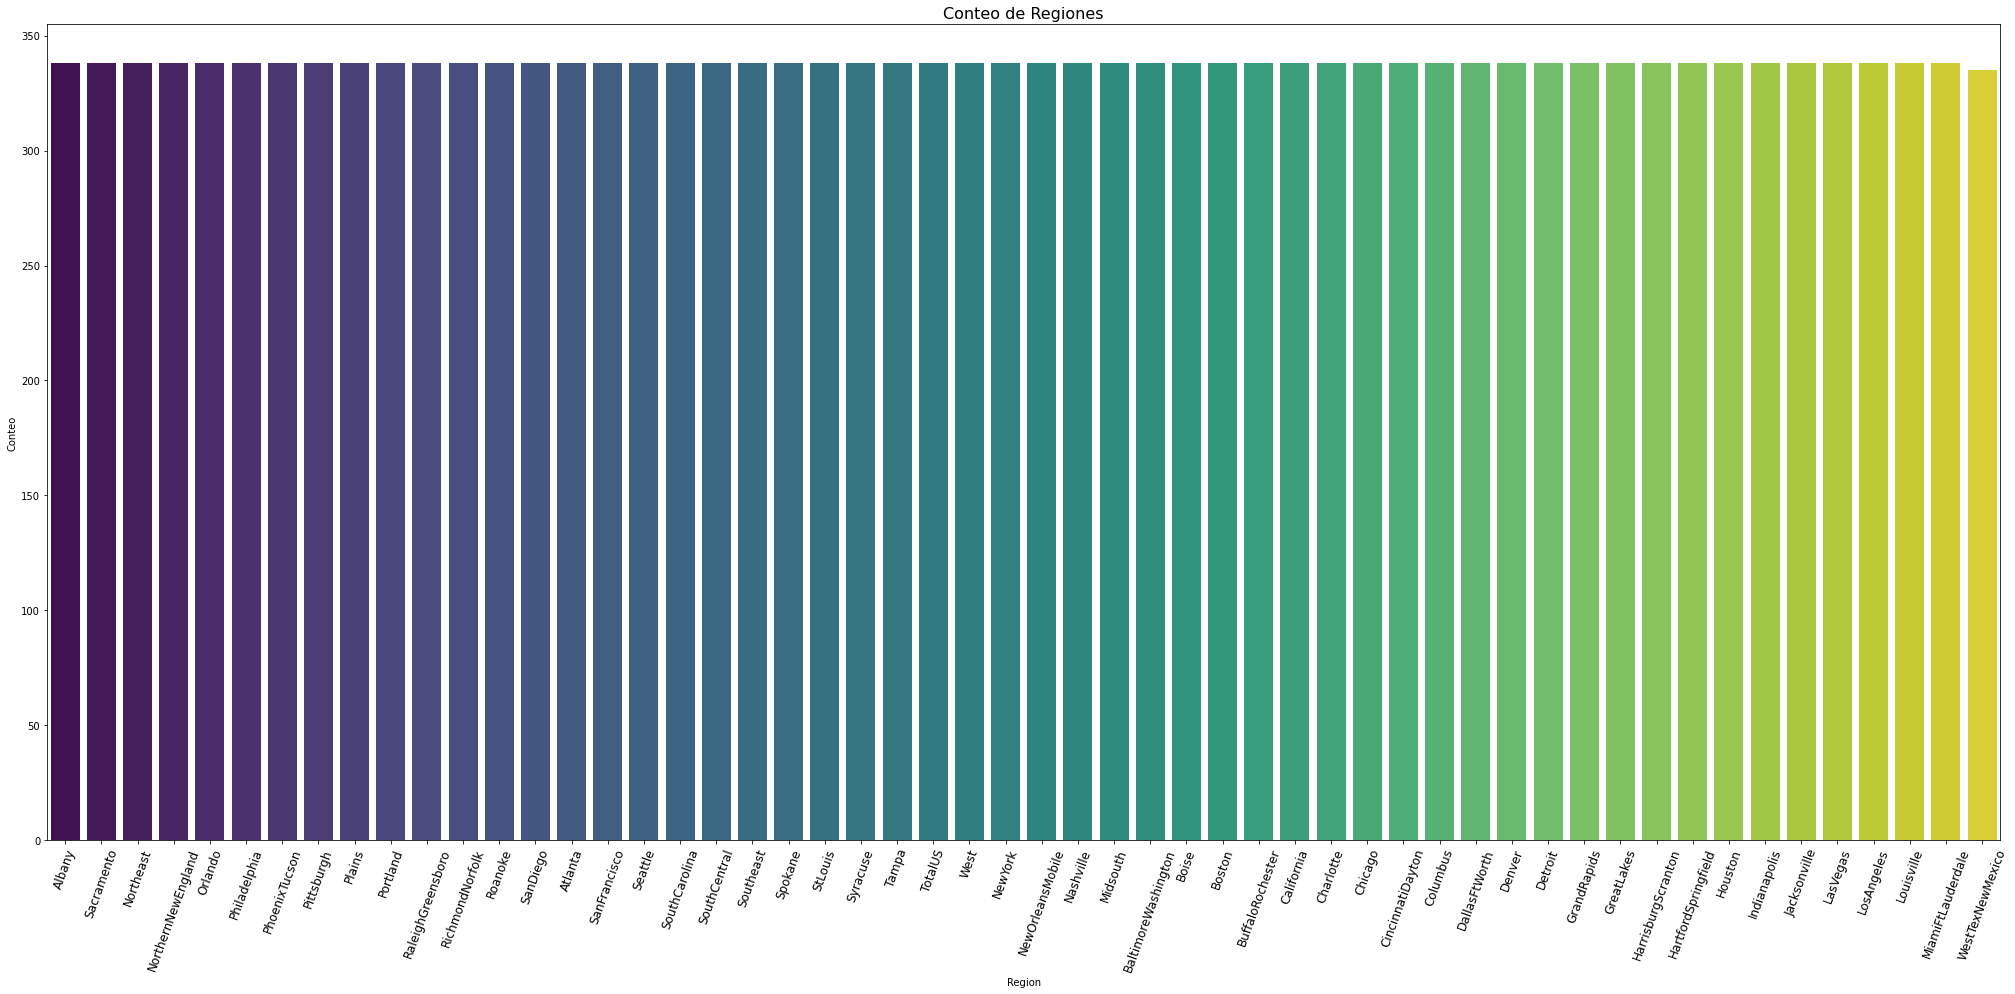

In [8]:
common_keywords=df["region"].value_counts().to_frame()
fig=plt.figure(figsize=(35,15))
sns.barplot(data=common_keywords,x=common_keywords.index,y="region",palette="viridis")
plt.title("Conteo de Regiones",size=16)
plt.xticks(rotation=70,size=12)
plt.xlabel('Region')
plt.ylabel('Conteo')

In [9]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Realizar una gráfica de barras para ver de qué años se tiene información

Text(0, 0.5, 'Conteo')

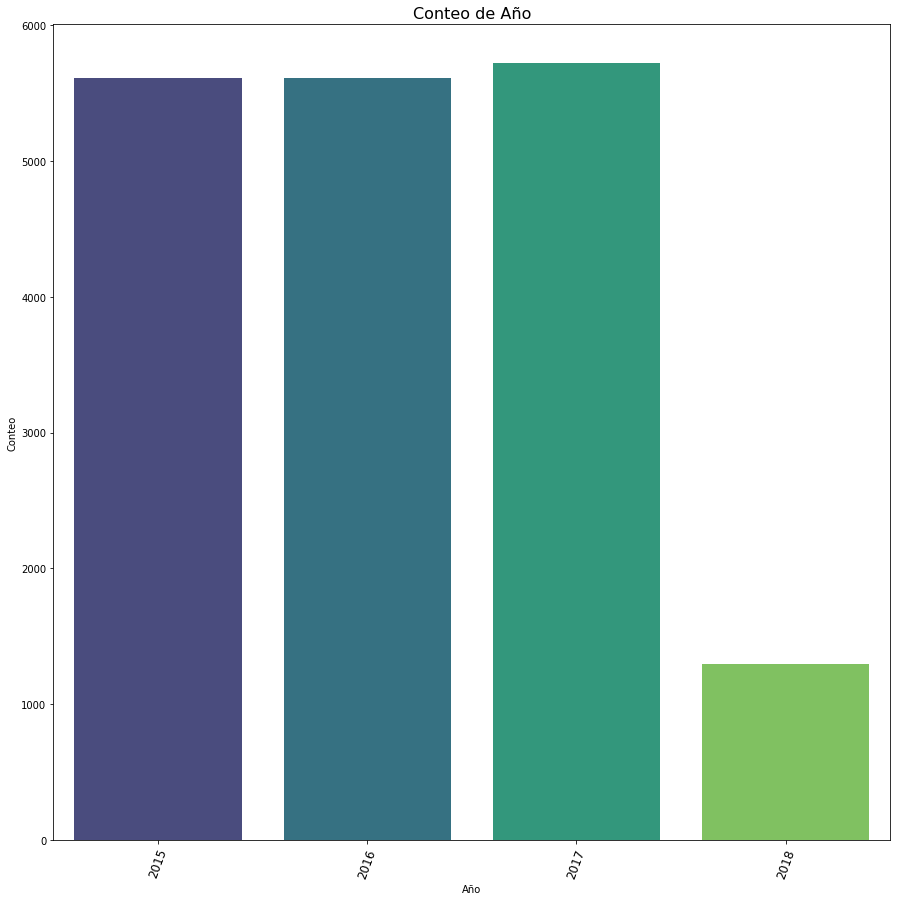

In [10]:
df['Year'] = df['Date'].dt.year

common_keywords=df["Year"].value_counts().to_frame()
fig=plt.figure(figsize=(15,15))
sns.barplot(data=common_keywords,x=common_keywords.index,y="Year",palette="viridis")
plt.title("Conteo de Año",size=16)
plt.xticks(rotation=70,size=12)
plt.xlabel('Año')
plt.ylabel('Conteo')

In [11]:
df["Year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

# Preparar los datos para que se acoplen a lo que requiere el modelo a utilizar

In [12]:
df_prepared = df[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
df_prepared.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


# Creación y ajuste del modelo

In [13]:
model = Prophet(interval_width = 0.95)
model.fit(df_prepared)

23:14:02 - cmdstanpy - INFO - Chain [1] start processing
23:14:08 - cmdstanpy - INFO - Chain [1] done processing


# Realizar predicciones

In [14]:
predictions = model.make_future_dataframe(periods=365, freq='D')

In [15]:
predictions.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


# Pronosticar hacia el futuro un año (365 días)

In [16]:
prediction = model.predict(predictions)

In [17]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498666,0.685929,2.139427,1.498666,1.498666,-0.114560,-0.114560,-0.114560,-0.114560,-0.114560,-0.114560,0.0,0.0,0.0,1.384106
1,2015-01-11,1.493474,0.654101,2.099525,1.493474,1.493474,-0.106156,-0.106156,-0.106156,-0.106156,-0.106156,-0.106156,0.0,0.0,0.0,1.387318
2,2015-01-18,1.488283,0.683250,2.145403,1.488283,1.488283,-0.105883,-0.105883,-0.105883,-0.105883,-0.105883,-0.105883,0.0,0.0,0.0,1.382400
3,2015-01-25,1.483091,0.659245,2.047041,1.483091,1.483091,-0.124901,-0.124901,-0.124901,-0.124901,-0.124901,-0.124901,0.0,0.0,0.0,1.358190
4,2015-02-01,1.477900,0.598695,2.077133,1.477900,1.477900,-0.153304,-0.153304,-0.153304,-0.153304,-0.153304,-0.153304,0.0,0.0,0.0,1.324596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.170176,0.271865,1.881257,0.854661,1.474782,-0.087160,-0.087160,-0.087160,-0.087160,-0.087160,-0.087160,0.0,0.0,0.0,1.083015
530,2019-03-22,1.169461,0.280874,1.867359,0.852396,1.475452,-0.085454,-0.085454,-0.085454,-0.085454,-0.085454,-0.085454,0.0,0.0,0.0,1.084007
531,2019-03-23,1.168747,0.212081,1.896114,0.850131,1.476122,-0.083473,-0.083473,-0.083473,-0.083473,-0.083473,-0.083473,0.0,0.0,0.0,1.085274
532,2019-03-24,1.168033,0.217650,1.851857,0.847900,1.476793,-0.081237,-0.081237,-0.081237,-0.081237,-0.081237,-0.081237,0.0,0.0,0.0,1.086796


# Graficar los datos históricos y los del futuro

In [18]:
mean_price = df[['Date', 'AveragePrice']].groupby('Date')['AveragePrice'].mean()

Text(0, 0.5, 'Precio Promedio')

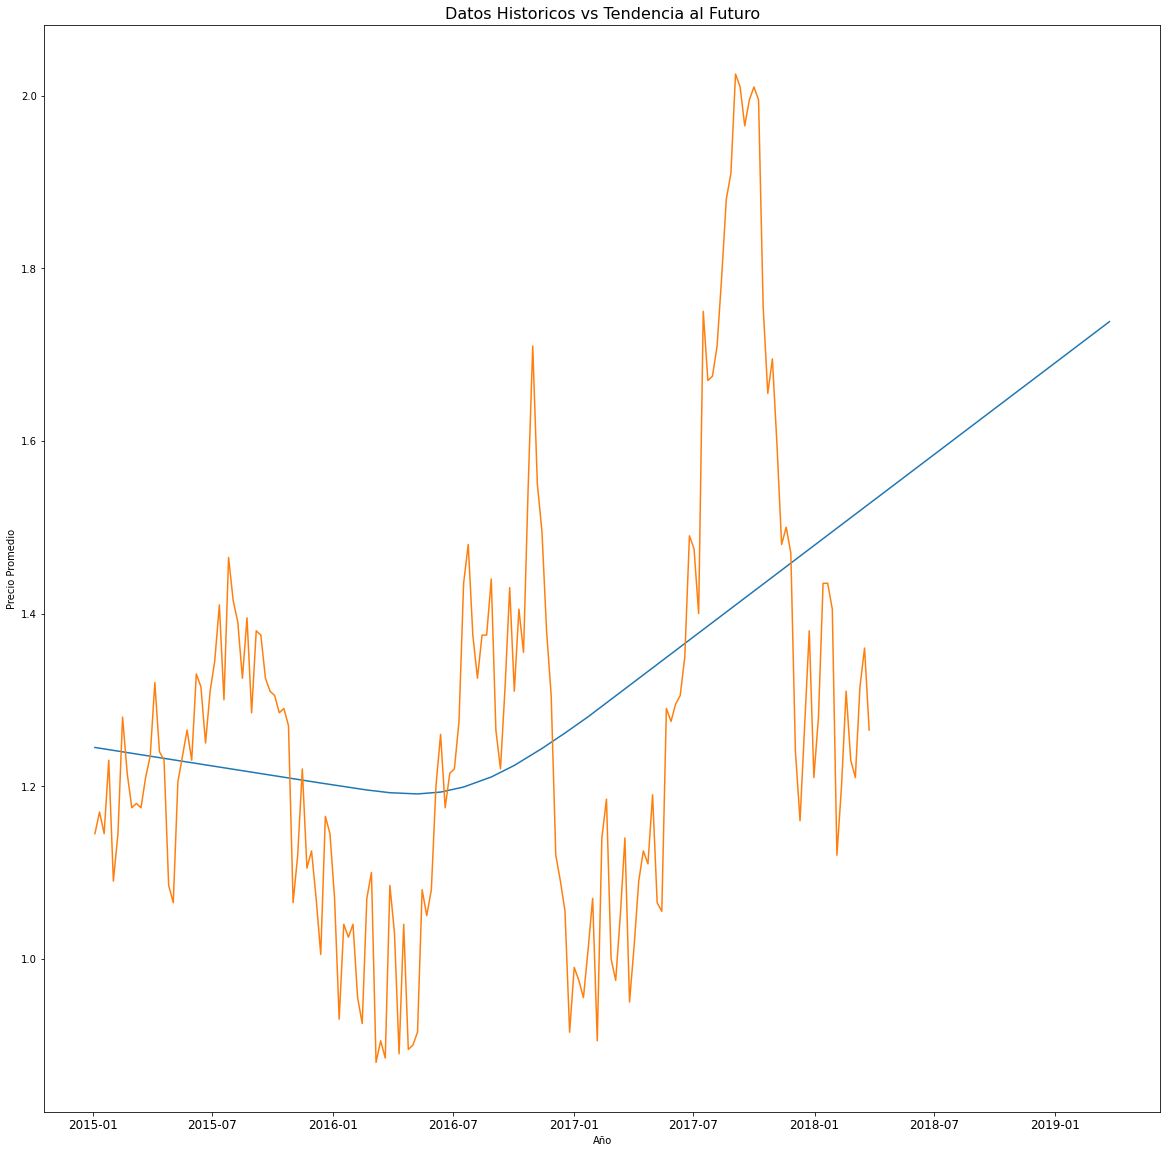

In [73]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.plot(prediction['ds'], prediction['trend'], label = "Prediction")
plt.plot(mean_price.index, mean_price, label = "Historical")
plt.title("Datos Historicos vs Tendencia al Futuro",size=16)
plt.xticks(size=12)
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

# Graficar los componentes del pronóstico

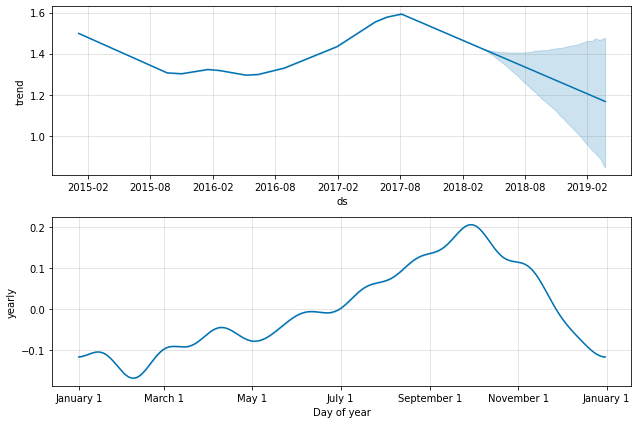

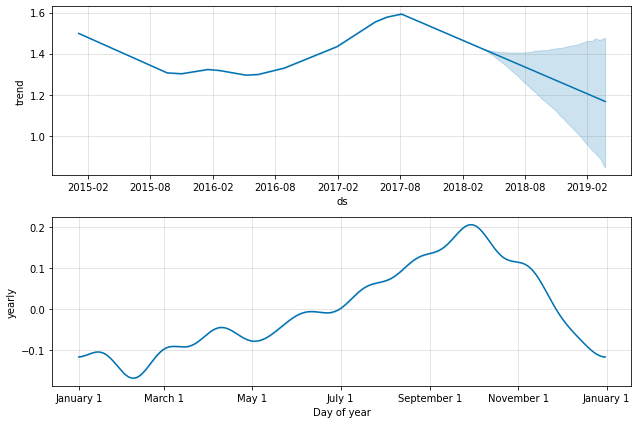

In [22]:
model.plot_components(prediction)

Como se puede ver en la grafica que contiene los datos actuales vs los futuros datos, y los componentes de esta, se puede ver que existirá una disminucion del precio promedio en los siguientes meses. Y esto sigue la misma tendencia de los años anteriores, dado a que la prediccion es

# PARTE 2

### Repetir el ejercicio pero solo con la región oeste "West" de los EEUU

### Leer el archivo de datos

In [63]:
df = pd.read_csv('aguacates_EEUU.csv')

In [64]:
df = df[df['region'] == 'West']
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


### Por si acaso no están ordenadas las observaciones

In [65]:
# convert to date
df['Date'] = pd.to_datetime(df['Date'])

In [66]:
df.sort_values(by='Date')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


# Graficar el precio promedio vs fecha

### ¿Es diferente la tendencia comparado a la tendencia nacional?

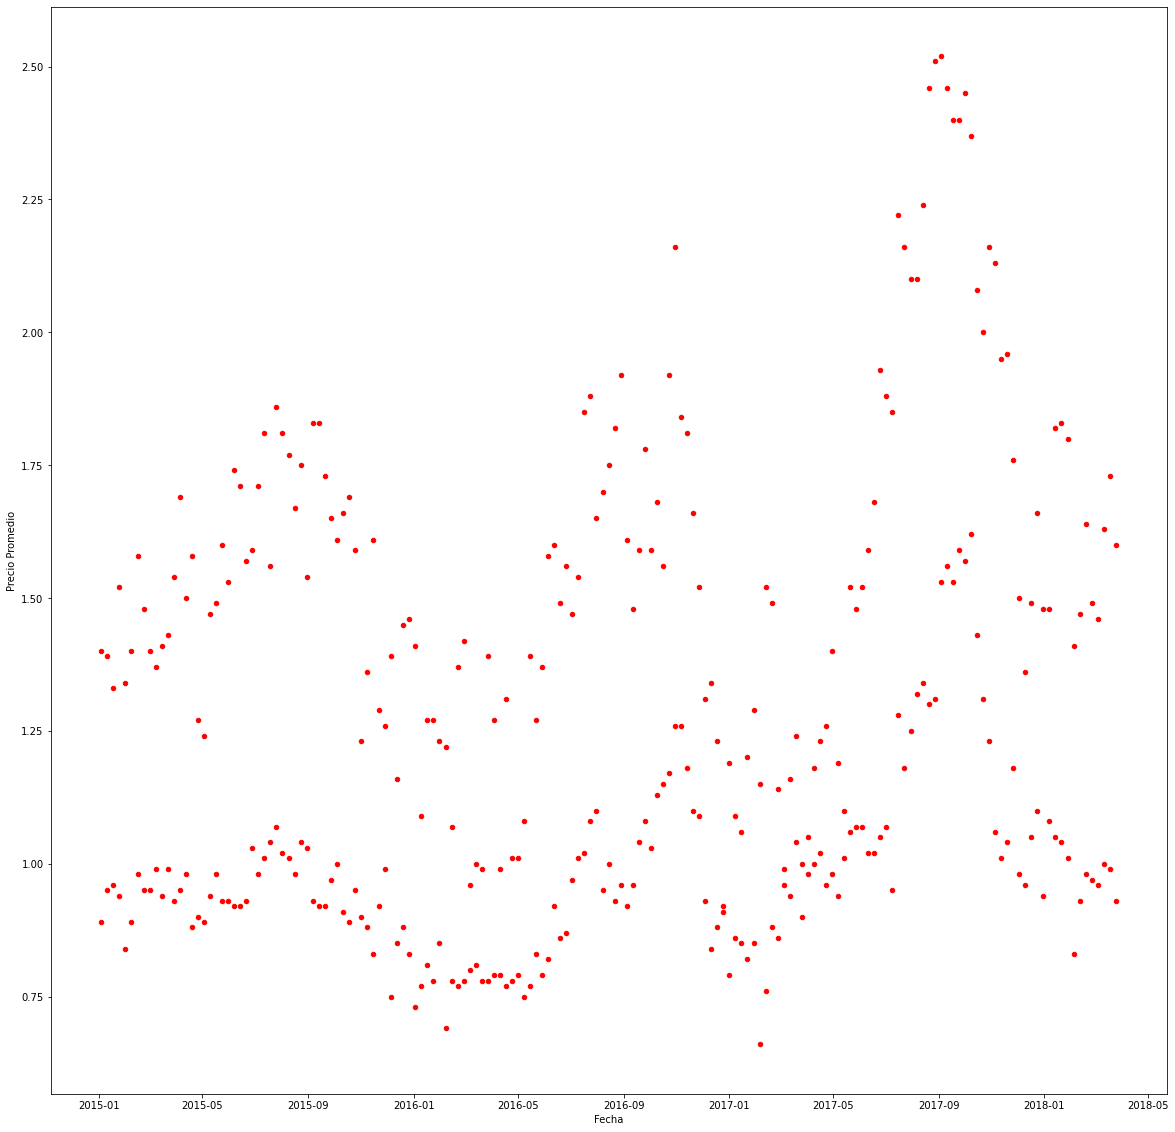

In [67]:
df.plot(kind='scatter',x='Date',y='AveragePrice',color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

Se puede apreciar que sigue la misma tendencia a comparacion de a la de nivel nacional, la cual es que aumente a finales del año y empiece a disminuir a principios del siguiente.

# Crear el modelo y ajustarlo con los datos

### Preparar los datos para que sean aceptados por el modelo a usar

In [58]:
df_prepared = df[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})
df_prepared.head()

,ds,y
2704,2015-12-27,0.83
2705,2015-12-20,0.88
2706,2015-12-13,0.85
2707,2015-12-06,0.75
2708,2015-11-29,0.99


In [59]:
model = Prophet(interval_width = 0.95)
model.fit(df_prepared)

23:33:34 - cmdstanpy - INFO - Chain [1] start processing
23:33:34 - cmdstanpy - INFO - Chain [1] done processing


# Pronosticar al futuro un año (365 días)

In [60]:
prediction = model.predict(predictions)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244817,0.436888,1.666248,1.244817,1.244817,-0.184886,-0.184886,-0.184886,-0.184886,-0.184886,-0.184886,0.0,0.0,0.0,1.059931
1,2015-01-11,1.243974,0.462700,1.696404,1.243974,1.243974,-0.165295,-0.165295,-0.165295,-0.165295,-0.165295,-0.165295,0.0,0.0,0.0,1.078679
2,2015-01-18,1.243131,0.450135,1.732813,1.243131,1.243131,-0.156108,-0.156108,-0.156108,-0.156108,-0.156108,-0.156108,0.0,0.0,0.0,1.087023
3,2015-01-25,1.242288,0.401109,1.690498,1.242288,1.242288,-0.168794,-0.168794,-0.168794,-0.168794,-0.168794,-0.168794,0.0,0.0,0.0,1.073494
4,2015-02-01,1.241444,0.426547,1.692038,1.241444,1.241444,-0.191185,-0.191185,-0.191185,-0.191185,-0.191185,-0.191185,0.0,0.0,0.0,1.050260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735840,0.863518,2.234647,1.697733,1.781183,-0.204383,-0.204383,-0.204383,-0.204383,-0.204383,-0.204383,0.0,0.0,0.0,1.531458
530,2019-03-22,1.736418,0.868759,2.201280,1.698101,1.781958,-0.199298,-0.199298,-0.199298,-0.199298,-0.199298,-0.199298,0.0,0.0,0.0,1.537120
531,2019-03-23,1.736996,0.872511,2.167907,1.698559,1.782759,-0.193648,-0.193648,-0.193648,-0.193648,-0.193648,-0.193648,0.0,0.0,0.0,1.543349
532,2019-03-24,1.737574,0.913501,2.203775,1.699051,1.783472,-0.187537,-0.187537,-0.187537,-0.187537,-0.187537,-0.187537,0.0,0.0,0.0,1.550038


# Graficar datos históricos y pronosticados

In [61]:
mean_price = df[['Date', 'AveragePrice']].groupby('Date')['AveragePrice'].mean()

Text(0, 0.5, 'Precio Promedio')

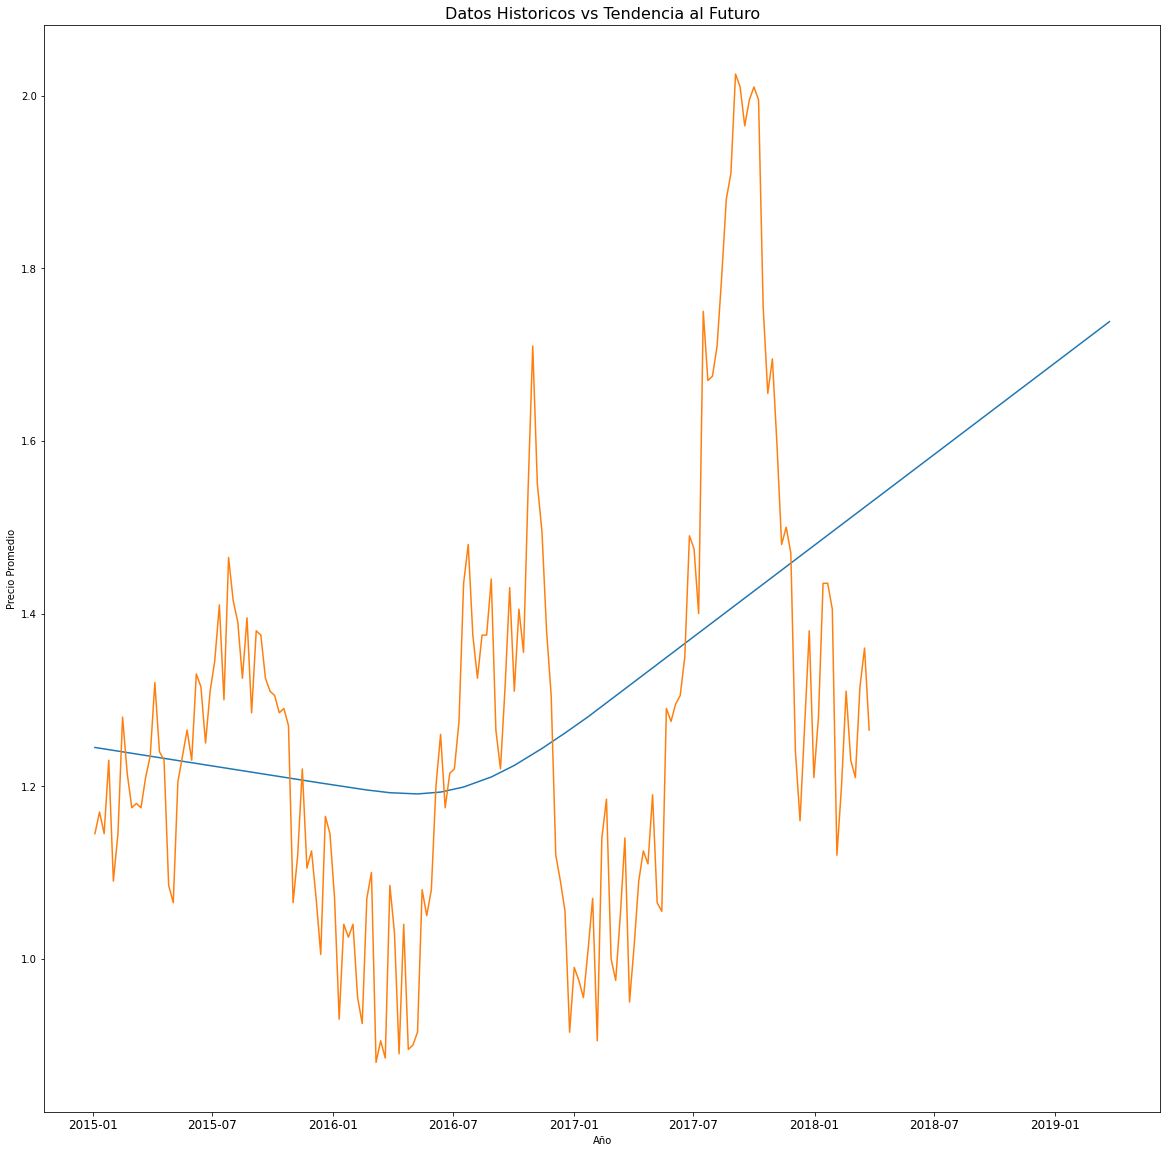

In [74]:
plt.rcParams['figure.figsize'] = [20, 20]
plt.plot(prediction['ds'], prediction['trend'], label = "Prediction")
plt.plot(mean_price.index, mean_price, label = "Historical")
plt.title("Datos Historicos vs Tendencia al Futuro",size=16)
plt.xticks(size=12)
plt.xlabel('Año')
plt.ylabel('Precio Promedio')

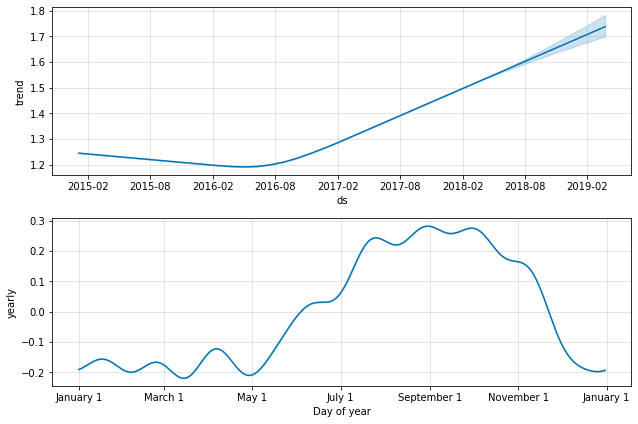

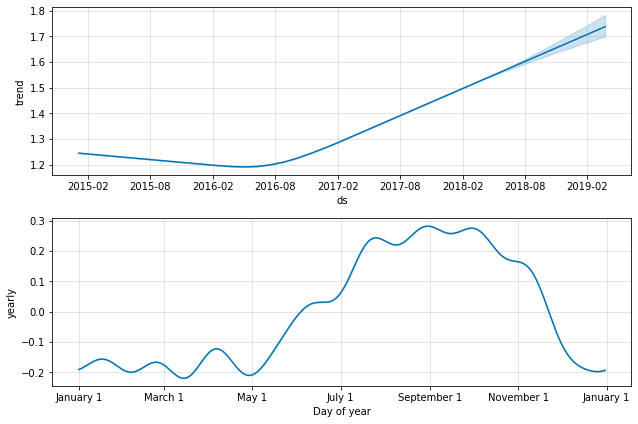

In [72]:
model.plot_components(prediction)

A pesar de que sigue la misma tendencia a nivel nacional, se predice que aumentará en los proximos meses a principios del siguiente año. Esto pareciera que no sigue la misma tendencia a futuro a nivel nacional como en el analisis anterior.